# Global mean Sea Surface Temperatures

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import platform

plt.rcParams['figure.figsize'] = (10, 4)

#### Settings

In [2]:
#To compute de climatoloy
year1='1982'
year2='1992'
year2='1984'

## Load data

In [3]:
base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
#base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'

files = [f'{base_file}.{year}.nc' for year in range(1982, 1985)]
DS = xr.open_mfdataset(files)

#titulo_short = 'NH'
#titulo = 'Northern hemisphere'
#sst = DS.sst.sel(lat=slice(0,80))

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'
#sst = DS.sst.sel(lat=slice( -80, 0))

titulo_short = 'GO'
titulo = 'Global Ocean'
sst = DS.sst.sel(lat=slice( -80, 80))

#titulo_short = 'NTenerife'
#titulo = 'North Tenerife'
#sst = DS.sst.sel(lon=slice(360-16.,360-15.),lat=slice(28.50,28.75))

## Global mean

>>>>> Global OceanGO
    > Global mean


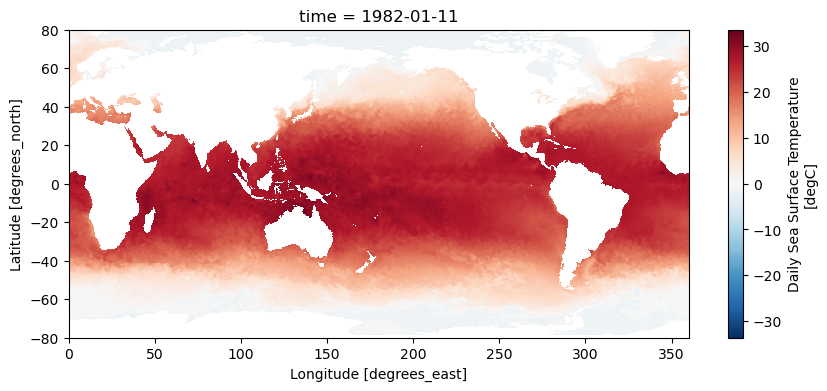

In [8]:
sst[10,:,:].plot()
print('>>>>> '+titulo+titulo_short)
print('    > Global mean')

In [107]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_weighted = sst.weighted(weights)
sst_wmean = sst_weighted.mean(("lon", "lat"),skipna=True).load()

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [67]:
#Create monthly climatology
sst_clim = sst.sel(time=slice(year1,year2)).groupby('time.dayofyear').mean(dim='time').load();

In [68]:
#Create anomaly
sst_anom = sst.groupby('time.dayofyear') - sst_clim

## Global mean anomaly

In [86]:
# Calculate global mean weigthtened
# For a rectangular grid the cosine of the latitude is proportional to the grid cell area.
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_anom_weighted = sst_anom.weighted(weights)
sst_anom_wmean = sst_anom_weighted.mean(("lon", "lat"),skipna=True).load()

In [87]:
# smoothed versions
sst_wmean_rolling = sst_wmean.rolling(time=360,center=True).mean()
sst_anom_wmean_rolling = sst_anom_wmean.rolling(time=360,center=True).mean()

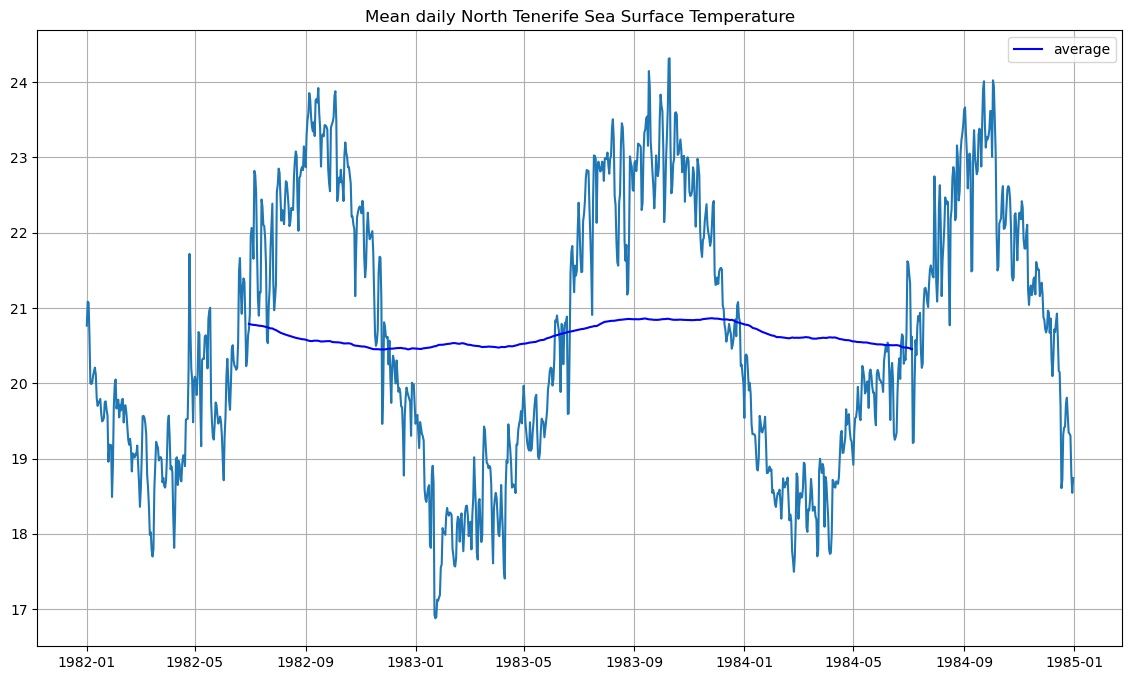

In [88]:
fig, ax = plt.subplots(1, 1 , figsize=(14,8))
ax.plot(sst_Wmean.time,sst_wmean)
ax.plot(sst_Wmean_rolling.time,sst_wmean_rolling,'-b',label='average')
ax.grid()
ax.legend()
ax.set_title('Mean daily '+titulo+' Sea Surface Temperature');

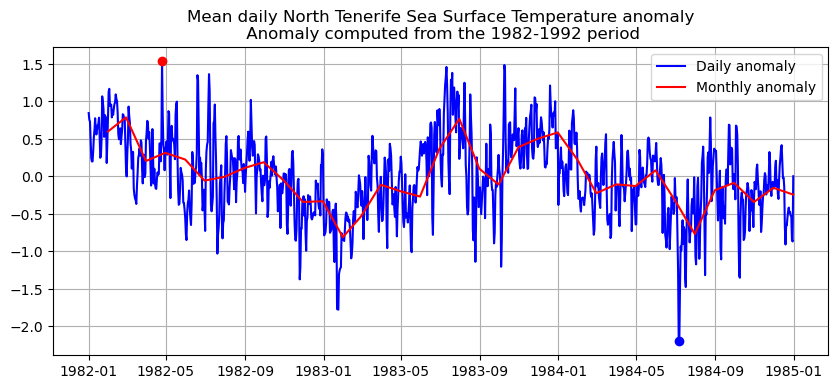

In [89]:
fig, ax = plt.subplots(1, 1 , figsize=(10,4))
ax.plot(sst_anom_wmean.time        ,sst_anom_wmean,'b',label='Daily anomaly')
ax.plot(sst_anom_wmean_rolling.time,sst_anom_wmean_rolling,'r')

ax.plot(sst_anom_wmean.time.isel(sst_anom_wmean.argmax(...)),
        sst_anom_wmean.isel(sst_anom_wmean.argmax(...)),'ro')
ax.plot(sst_anom_wmean.time.isel(sst_anom_Wmean.argmin(...)),
        sst_anom_wmean.isel(sst_anom_wmean.argmin(...)),'bo')

ax.grid()
ax.legend()
ax.set_title('Mean daily '+titulo+' Sea Surface Temperature anomaly\n Anomaly computed from the 1982-1992 period');

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 366)

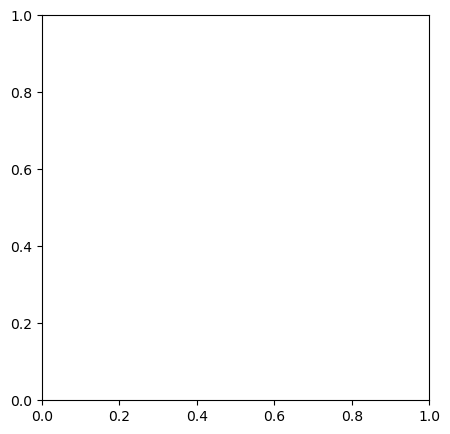

In [73]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(sst_clim.mean(dim='lon').dayofyear,
                 sst_clim.mean(dim='lon').lat,
                 sst_clim.mean(dim='lon').transpose(),levels=12, vmin=-2, vmax=30)
ax.set_ylim(-78,78)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + year1 + '-' + year2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

In [74]:
sst_wmean.to_netcdf('./data/Psstd_mean_'+titulo_short+'.nc',mode='w')
sst_clim.to_netcdf('./data/Psstd_clim_'+titulo_short+'.nc',mode='w')
sst_anom_wmean.to_netcdf('./data/Psstd_anom_mean_'+titulo_short+'.nc',mode='w')